In [1]:
#1 gauss seidel
import numpy as np



In [10]:
matrix_x = [
    [
        [8, -2, 3],
        [-1, 10, -2],
        [2, 1, 9]
    ],
    [
        [6, 1, -1],
        [1, 7, 2],
        [-1, 2, 8]
    ],
    [
        [7, -2, 1],
        [1, 8, -2],
        [2, 1, 9]
    ],
    [
        [10, 1, 1],
        [1, 11, -1],
        [1, -1, 12]
    ],
    [
        [2, -4, 1],
        [3, 2, -5],
        [-4, 6, 2]
    ],
    [
        [-3, 1, -4],
        [1, -2, 5],
        [2, 3, -1]
    ],
    [
        [1, 2, -3],
        [1, 8, -2],
        [7, -8, 9]
    ],
    [
        [3, -1, 4],
        [1, 2, -5],
        [2, -3, 1]
    ]
]


matrix_y = [
    [10,15,25],
    [8,14,20],
    [9,10,11],
    [12,14,16],
    [-3,7,1],
    [-6,7,8],
    [5, -8,10],
    [5, 3, 7]
]

def diagonally_dominant(matrix):
    diagonal = np.diag(np.abs(matrix))
    non_diagonal = np.sum(np.abs(matrix), axis = 1) - diagonal
    return np.all(diagonal > non_diagonal)

def gauss_seidel(matrix_a, matrix_b, eps = 0.082, max_iter = 25):
    matrix_a = np.array(matrix_a, dtype = float)
    matrix_b = np.array(matrix_b, dtype = float)
    diag = np.diag(matrix_a)
    x = np.zeros_like(matrix_b)
    
    for iteration in range(1, max_iter + 1):
        x_new = np.copy(x)
        
        for i in range(len(matrix_a)):
            sum_ax = np.dot(matrix_a[i,:], x_new) - matrix_a[i,i] * x_new[i]
            x_new[i] = (matrix_b[i] - sum_ax) / diag[i]
            
        euclid_norm = np.linalg.norm(x_new - x)
        print(f"iteration {iteration} = {x_new.tolist()}")
        x = x_new
        
        if euclid_norm < eps:
            print("Convergent!\n")
            return
        
for i, (a,b) in enumerate(zip(matrix_x, matrix_y)):
    print(f"Matrix {i+1}")
    
    if diagonally_dominant(a):
        gauss_seidel(a,b)
    else:
        print("Not Diagonally Dominant, Thus not convergent.\n")

Matrix 1
iteration 1 = [1.25, 1.625, 2.3194444444444446]
iteration 2 = [0.7864583333333333, 2.0425347222222223, 2.3760609567901234]
iteration 3 = [0.8696108217592593, 2.0621732735339506, 2.355400564771948]
iteration 4 = [0.8822681065940072, 2.05930692361379, 2.3529063181331327]
Convergent!

Matrix 2
iteration 1 = [1.3333333333333333, 1.8095238095238095, 2.2142857142857144]
iteration 2 = [1.400793650793651, 1.1672335600907027, 2.3832908163265305]
iteration 3 = [1.5360095427059715, 1.099629832091567, 2.4170937348153547]
iteration 4 = [1.5529106504539645, 1.087557411416475, 2.422224478452627]
Convergent!

Matrix 3
iteration 1 = [1.2857142857142858, 1.0892857142857142, 0.8154761904761905]
iteration 2 = [1.480442176870748, 1.2688137755102042, 0.7522557634164779]
iteration 3 = [1.5407673982291328, 1.245468016075478, 0.7414441319406951]
Convergent!

Matrix 4
iteration 1 = [1.2, 1.1636363636363638, 1.3303030303030303]
iteration 2 = [0.9506060606060606, 1.3072451790633608, 1.3630532598714418]
i

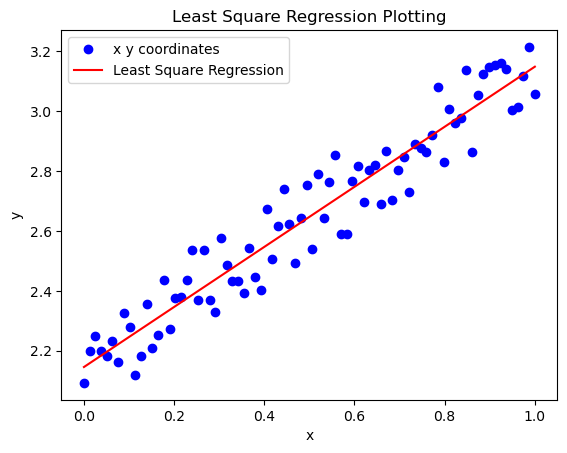

In [11]:
#2 Regression and ploting

import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.0, 0.01265823, 0.02531646, 0.03797468, 0.05063291, 0.06329114,
0.07594937, 0.08860759, 0.10126582, 0.11392405, 0.12658228, 0.13924051,
0.15189873, 0.16455696, 0.17721519, 0.18987342, 0.20253165, 0.21518987,
0.2278481, 0.24050633, 0.25316456, 0.26582278, 0.27848101, 0.29113924,
0.30379747, 0.3164557, 0.32911392, 0.34177215, 0.35443038, 0.36708861,
0.37974684, 0.39240506, 0.40506329, 0.41772152, 0.43037975, 0.44303797,
0.4556962, 0.46835443, 0.48101266, 0.49367089, 0.50632911, 0.51898734,
0.53164557, 0.5443038, 0.55696203, 0.56962025, 0.58227848, 0.59493671,
0.60759494, 0.62025316, 0.63291139, 0.64556962, 0.65822785, 0.67088608,
0.6835443, 0.69620253, 0.70886076, 0.72151899, 0.73417722, 0.74683544,
0.75949367, 0.7721519, 0.78481013, 0.79746835, 0.81012658, 0.82278481,
0.83544304, 0.84810127, 0.86075949, 0.87341772, 0.88607595, 0.89873418,
0.91139241, 0.92405063, 0.93670886, 0.94936709, 0.96202532, 0.97468354,
0.98734177, 1.0])

y = np.array([2.09271945, 2.20028729, 2.25065766, 2.19974036, 2.18315491, 2.23194821,
2.16162725, 2.32693546, 2.27891101, 2.11751791, 2.1817317, 2.35680097,
2.20811778, 2.25274117, 2.4370985, 2.27372116, 2.37711196, 2.3783529,
2.43531517, 2.53773363, 2.36819891, 2.53666574, 2.36994729, 2.32868594,
2.57598781, 2.48459811, 2.4316247, 2.43237323, 2.39305619, 2.54415464,
2.44582352, 2.40166229, 2.67429708, 2.50764819, 2.61786442, 2.73820088,
2.62334732, 2.49238012, 2.64213359, 2.75184226, 2.5395776, 2.78986665,
2.64306456, 2.7631048, 2.85332376, 2.58884493, 2.59020845, 2.76524818,
2.81706237, 2.69608111, 2.802584, 2.82130965, 2.69087715, 2.86650847,
2.70441594, 2.80210609, 2.84531659, 2.72979077, 2.89120147, 2.87813038,
2.8630733, 2.91861252, 3.07955386, 2.83050749, 3.00522466, 2.96149855,
2.97810712, 3.13775419, 2.86423362, 3.05292434, 3.1226691, 3.14746303,
3.15208506, 3.16016772, 3.14045025, 3.00421247, 3.0136957, 3.116399,
3.21368012, 3.05797481])

A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

first = np.linalg.inv(np.dot(A.T, A))
second = np.dot(first, A.T)
result = np.dot(second, y)

plt.plot(x, y, 'bo', label = 'x y coordinates')
plt.plot(x, result[0]*x + result[1], 'r-', label = 'Least Square Regression')
plt.title("Least Square Regression Plotting")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [20]:
#3 Newton Rhapson

import numpy as np

def f(x):
    return 3*x**4 + 2*x**3 - 6*x**2 + 2

def g(x):
    return 12*x**3 + 6*x**2 - 12*x + 2

def newton_rhapson(x, eps = 0.082, max_iter = 30):
    for i in range(max_iter):
        x_new = x - f(x) / g(x)
        
        print(f"Iteration {i + 1}: new root = {x_new}")
        
        if(abs(x_new - x) < eps):
            print(f"The root of equation is = {x_new}")
        x = x_new
        
    print("error message")
    return None

newton_rhapson(5)

Iteration 1: new root = 3.758165829145729
Iteration 2: new root = 2.8417760011236353
Iteration 3: new root = 2.173057925034234
Iteration 4: new root = 1.6935500172272708
Iteration 5: new root = 1.358008451357018
Iteration 6: new root = 1.128839115848489
Iteration 7: new root = 0.9714717169533076
Iteration 8: new root = 0.8511391132947493
Iteration 9: new root = 0.7206232868455296
Iteration 10: new root = 0.2600457988555279
Iteration 11: new root = 3.521660315458404
Iteration 12: new root = 2.6683455441975994
Iteration 13: new root = 2.047771964871579
Iteration 14: new root = 1.6050360418101044
Iteration 15: new root = 1.2971292123251423
Iteration 16: new root = 1.0875045955558242
Iteration 17: new root = 0.9418216980347188
Iteration 18: new root = 0.8245200497973388
Iteration 19: new root = 0.6772977863475815
Iteration 20: new root = -0.7392026083205883
Iteration 21: new root = -0.6112052092728613
Iteration 22: new root = -0.57958196669517
The root of equation is = -0.57958196669517
It

In [15]:
#4 Integral Rieman

def f(x):
    return 4*x**3 + 6*x**2 - 4*x + 5

start = -3
end = 8
interval = 2400

h = (end - start) / (interval - 1)
points = np.linspace(start, end, interval)

Trapezoid = h / 2 *(
    f(points[0]) + f(points[-1]) + 2 * np.sum(f(points[1:-1]))
)

print(Trapezoid)

Mid_Riemann = h * np.sum(f((points[1] + points[-1])/2))

print(Mid_Riemann)



5038.001387614438
0.4366607690335288
